In [1]:
# === BASIC LIBRARIES ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# === SCIKIT-LEARN ===
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.metrics import f1_score, accuracy_score 
from sklearn.model_selection import RandomizedSearchCV


# === IMBALANCED-LEARN ===
from imblearn.over_sampling import SMOTE

# === TENSORFLOW / KERAS ===
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers, layers, models
from tensorflow.keras.optimizers import Adam

# === PYTORCH ===
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.cuda.amp import autocast, GradScaler
from sklearn.pipeline import Pipeline


# === BOOSTING MODELS ===
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



In [2]:
#SEED FOR REPRODUCIBILITY 
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# preprocessing 

---



In [4]:
df = pd.read_csv("C:/Users/ATHEER/Downloads/data/creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 284807 rows and 31 columns


In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.describe().round(2).style.background_gradient(cmap='Greens')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.860000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.350000,0.000000
std,47488.150000,1.960000,1.650000,1.520000,1.420000,1.380000,1.330000,1.240000,1.190000,1.100000,1.090000,1.020000,1.000000,1.000000,0.960000,0.920000,0.880000,0.850000,0.840000,0.810000,0.770000,0.730000,0.730000,0.620000,0.610000,0.520000,0.480000,0.400000,0.330000,250.120000,0.040000
min,0.000000,-56.410000,-72.720000,-48.330000,-5.680000,-113.740000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-5.790000,-19.210000,-4.500000,-14.130000,-25.160000,-9.500000,-7.210000,-54.500000,-34.830000,-10.930000,-44.810000,-2.840000,-10.300000,-2.600000,-22.570000,-15.430000,0.000000,0.000000
25%,54201.500000,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,-0.760000,-0.410000,-0.650000,-0.430000,-0.580000,-0.470000,-0.480000,-0.500000,-0.460000,-0.210000,-0.230000,-0.540000,-0.160000,-0.350000,-0.320000,-0.330000,-0.070000,-0.050000,5.600000,0.000000
50%,84692.000000,0.020000,0.070000,0.180000,-0.020000,-0.050000,-0.270000,0.040000,0.020000,-0.050000,-0.090000,-0.030000,0.140000,-0.010000,0.050000,0.050000,0.070000,-0.070000,-0.000000,0.000000,-0.060000,-0.030000,0.010000,-0.010000,0.040000,0.020000,-0.050000,0.000000,0.010000,22.000000,0.000000
75%,139320.500000,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,0.740000,0.620000,0.660000,0.490000,0.650000,0.520000,0.400000,0.500000,0.460000,0.130000,0.190000,0.530000,0.150000,0.440000,0.350000,0.240000,0.090000,0.080000,77.160000,0.000000
max,172792.000000,2.450000,22.060000,9.380000,16.880000,34.800000,73.300000,120.590000,20.010000,15.590000,23.750000,12.020000,7.850000,7.130000,10.530000,8.880000,17.320000,9.250000,5.040000,5.590000,39.420000,27.200000,10.500000,22.530000,4.580000,7.520000,3.520000,31.610000,33.850000,25691.160000,1.000000


In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(1081)

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
labels = ["Not Fraud", "Fraud"]

# Calculate the number of samples for each class
class_counts = df["Class"].value_counts()

# Print the number of samples for each class
for i in class_counts.index:
    print(f"{labels[i]}: {class_counts[i]} samples")
# Plot
fig = px.pie(
    values=class_counts.values,
    names=[labels[i] for i in class_counts.index],
    width=800,
    height=400,
    title="Data Before Balance",
    color_discrete_sequence=["#2ca02c", "#98ee99"]
)
fig.show()


Not Fraud: 283253 samples
Fraud: 473 samples


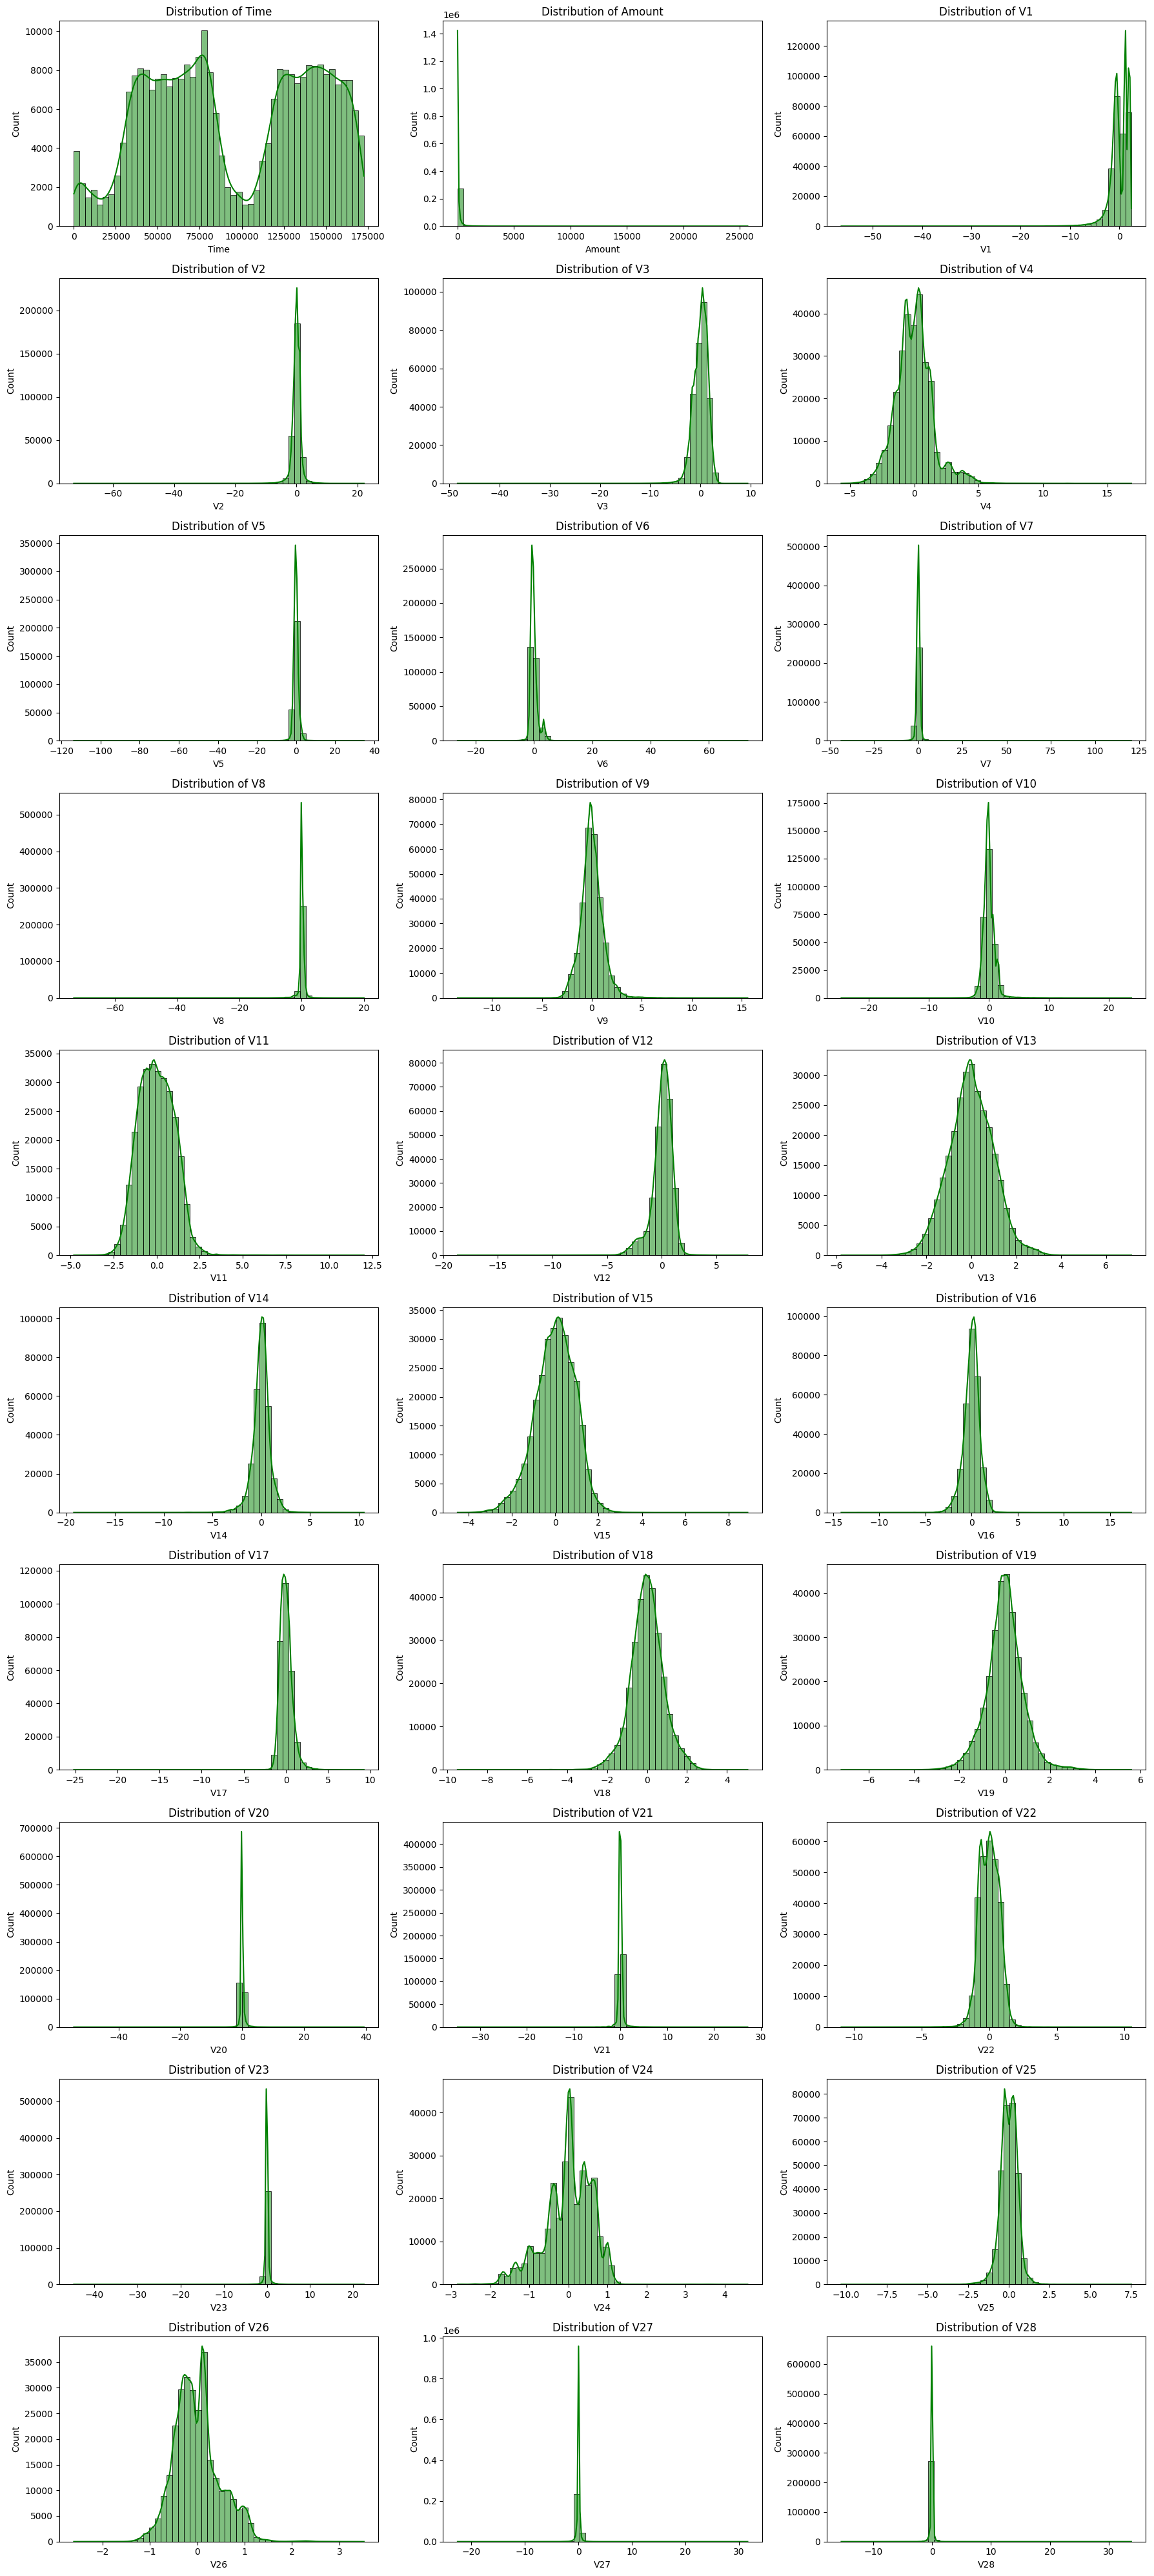

In [15]:
columns_to_plot = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]

n_cols = 3
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

plt.figure(figsize=(18, n_rows * 4))

for idx, column in enumerate(columns_to_plot):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.histplot(df[column], bins=50, kde=True, color='green')
    plt.title(f'Distribution of {column}', fontsize=12)

plt.tight_layout()
plt.show()


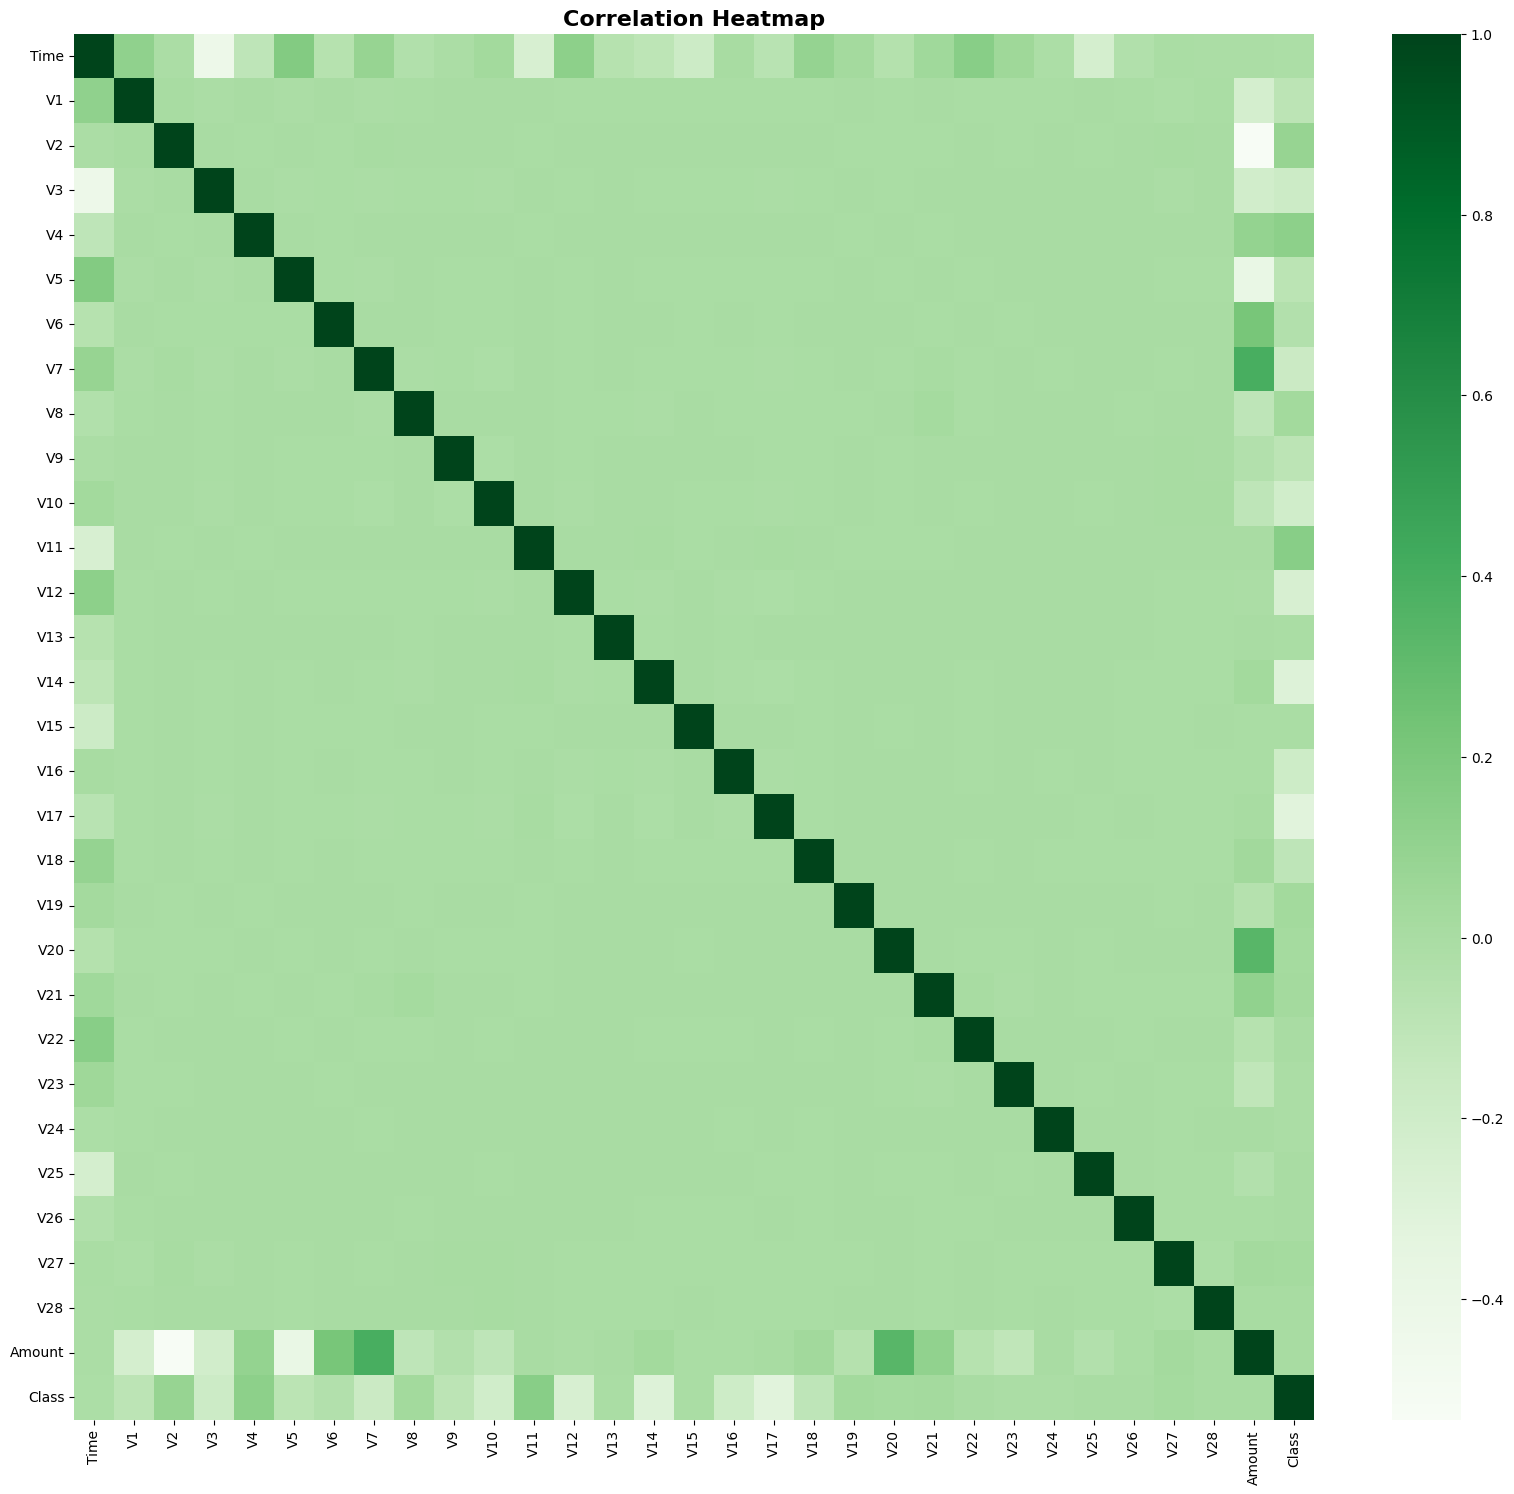

In [16]:
plt.figure(figsize=(20, 18))
corr = df.corr()
sns.heatmap(corr, cmap='Greens', annot=False)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

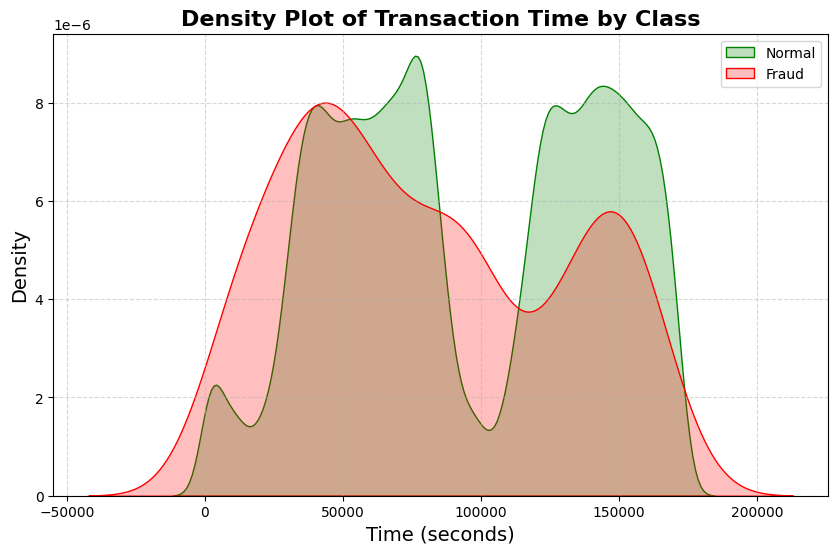

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Class'] == 0], x='Time', fill=True, label='Normal', color='green')
sns.kdeplot(data=df[df['Class'] == 1], x='Time', fill=True, label='Fraud', color='red')
plt.title('Density Plot of Transaction Time by Class', fontsize=16, fontweight='bold')
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#The plot shows the distribution of transactions over time, separated by class. Fraudulent transactions tend to occur at specific times, while normal transactions are more evenly spread.

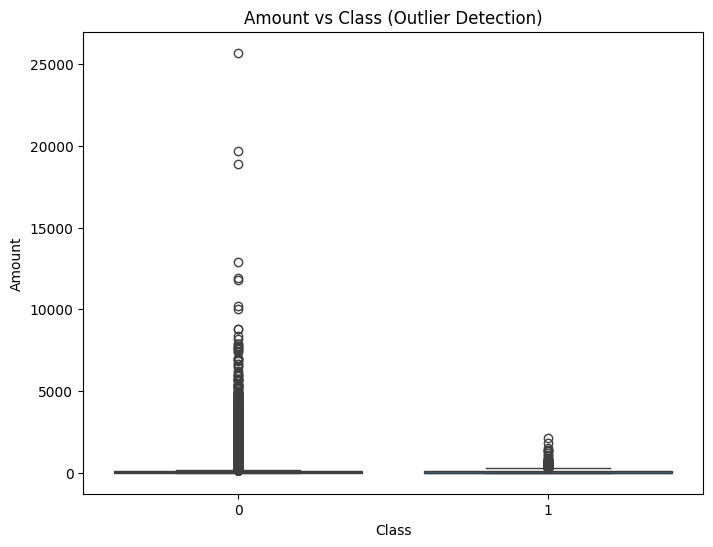

In [18]:
# Detect outliers using boxplot for Amount vs Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount vs Class (Outlier Detection)')
plt.show()

# **outliers**

---



In [19]:
feature_cols = [c for c in df.columns if c not in ['Class']]

In [20]:
#Calculate bounds for the  Class=0
maj_mask = df['Class'] == 0
bounds = {}
for col in feature_cols:
    lo = df.loc[maj_mask, col].quantile(0.01)  # 1st percentile
    hi = df.loc[maj_mask, col].quantile(0.99)  # 99th percentile
    bounds[col] = (lo, hi)
#Apply Winsorization
for col, (lo, hi) in bounds.items():
    df.loc[maj_mask, col] = df.loc[maj_mask, col].clip(lo, hi)
#Verify if capping worked correctly
still_extreme = {}
for col, (lo, hi) in bounds.items():
    col_vals = df.loc[maj_mask, col]
    min_val, max_val = col_vals.min(), col_vals.max()
    if min_val < lo or max_val > hi:
        still_extreme[col] = (min_val, max_val, lo, hi)

if still_extreme:
    print("Some features still have values outside the limits:")
    for col, (mn, mx, lo, hi) in still_extreme.items():
        print(f"  • {col}: min={mn:.3g} (<{lo:.3g}), max={mx:.3g} (>{hi:.3g})")
else:
    print("All features are within the limits.")


All features are within the limits.


# **Normalization**

---



In [21]:

scaler_amount = MinMaxScaler()
scaler_time = MinMaxScaler()

df["Amount"] = scaler_amount.fit_transform(df[["Amount"]])
df["Time"] = scaler_time.fit_transform(df[["Time"]])


In [22]:
scaler = Pipeline([
    ('robust', RobustScaler()),  # soft-cap outliers
    ('minmax', MinMaxScaler())   # squash to [0,1]
])



In [23]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [24]:
X_norm = X[y==0]

# **Sparse Autoencoder(unsupervised)**

---

In [25]:
X_tr_np, X_val_np = train_test_split(X_norm, test_size=0.2, random_state=SEED)

In [26]:
scaler.fit(X_tr_np)

X_tr_norm = scaler.transform(X_tr_np)
X_val_norm = scaler.transform(X_val_np)

X_tr = torch.tensor(X_tr_norm, dtype=torch.float32)
X_val = torch.tensor(X_val_norm, dtype=torch.float32)

In [27]:

class SparseAutoencoder(nn.Module):
    def __init__(self, input_dim, code_dim=15):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128), nn.BatchNorm1d(128), nn.ReLU(),
            nn.Linear(128, 64), nn.BatchNorm1d(64), nn.ReLU(),
            nn.Linear(64, 32), nn.BatchNorm1d(32), nn.ReLU(),
            nn.Linear(32, code_dim), nn.Sigmoid()
        )
        self.decoder = nn.Sequential(
            nn.Linear(code_dim, 32), nn.ReLU(),
            nn.Linear(32, 64), nn.ReLU(),
            nn.Linear(64, 128), nn.ReLU(),
            nn.Linear(128, input_dim), nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return z, x_hat

def train_sparse_ae(X_tr, X_val, code_dim=15, epochs=30, batch_size=256):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = SparseAutoencoder(input_dim=X_tr.shape[1], code_dim=code_dim).to(device)
    opt = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
    mse = nn.MSELoss()
    p, beta = 0.1, 0.01

    loader = DataLoader(TensorDataset(X_tr), batch_size=batch_size, shuffle=True)
    train_losses, val_losses = [], []

    for ep in range(1, epochs+1):
        model.train()
        train_loss = 0
        for (x_batch,) in loader:
            x = x_batch.to(device)
            opt.zero_grad()
            z, x_hat = model(x)
            loss_r = mse(x_hat, x)
            rho = z.mean(0).clamp(min=1e-10, max=1 - 1e-10)  # to avoid log(0)
            loss_s = (p * torch.log(p / rho) + (1 - p) * torch.log((1 - p) / (1 - rho))).sum()
            loss = loss_r + beta * loss_s
            loss.backward()
            opt.step()
            train_loss += loss.item()

        model.eval()
        with torch.no_grad():
            _, x_val_hat = model(X_val.to(device))
            val_loss = mse(x_val_hat, X_val.to(device)).item()

        avg_train_loss = train_loss / len(loader)
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)

        print(f"[Epoch {ep}] Train Loss: {avg_train_loss:.4f} — Val Loss: {val_loss:.4f}")
    plt.plot(train_losses, label='Train'); plt.plot(val_losses, label='Val'); plt.legend(); plt.title('Loss'); plt.show()
    return model.encoder


[Epoch 1] Train Loss: 0.0314 — Val Loss: 0.0241
[Epoch 2] Train Loss: 0.0214 — Val Loss: 0.0199
[Epoch 3] Train Loss: 0.0190 — Val Loss: 0.0177
[Epoch 4] Train Loss: 0.0167 — Val Loss: 0.0155
[Epoch 5] Train Loss: 0.0145 — Val Loss: 0.0136
[Epoch 6] Train Loss: 0.0133 — Val Loss: 0.0128
[Epoch 7] Train Loss: 0.0126 — Val Loss: 0.0121
[Epoch 8] Train Loss: 0.0120 — Val Loss: 0.0114
[Epoch 9] Train Loss: 0.0114 — Val Loss: 0.0109
[Epoch 10] Train Loss: 0.0110 — Val Loss: 0.0105
[Epoch 11] Train Loss: 0.0107 — Val Loss: 0.0103
[Epoch 12] Train Loss: 0.0104 — Val Loss: 0.0102
[Epoch 13] Train Loss: 0.0103 — Val Loss: 0.0099
[Epoch 14] Train Loss: 0.0101 — Val Loss: 0.0098
[Epoch 15] Train Loss: 0.0100 — Val Loss: 0.0097
[Epoch 16] Train Loss: 0.0099 — Val Loss: 0.0096
[Epoch 17] Train Loss: 0.0097 — Val Loss: 0.0094
[Epoch 18] Train Loss: 0.0096 — Val Loss: 0.0093
[Epoch 19] Train Loss: 0.0094 — Val Loss: 0.0090
[Epoch 20] Train Loss: 0.0092 — Val Loss: 0.0088
[Epoch 21] Train Loss: 0.0089

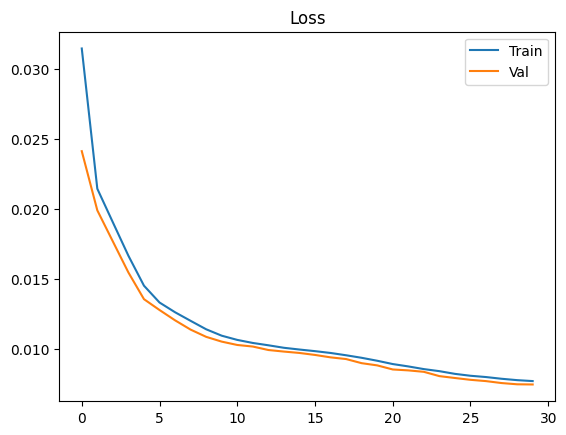

In [28]:
encoder1 = train_sparse_ae(
   X_tr, X_val,
  code_dim=15, epochs=30, batch_size=256
)

In [29]:
encoder1.eval()
with torch.no_grad():
    X_scaled = scaler.transform((X))
    sae_all = encoder1(torch.tensor(X_scaled, dtype=torch.float32).to(device))
    sae_all = sae_all.cpu().numpy()

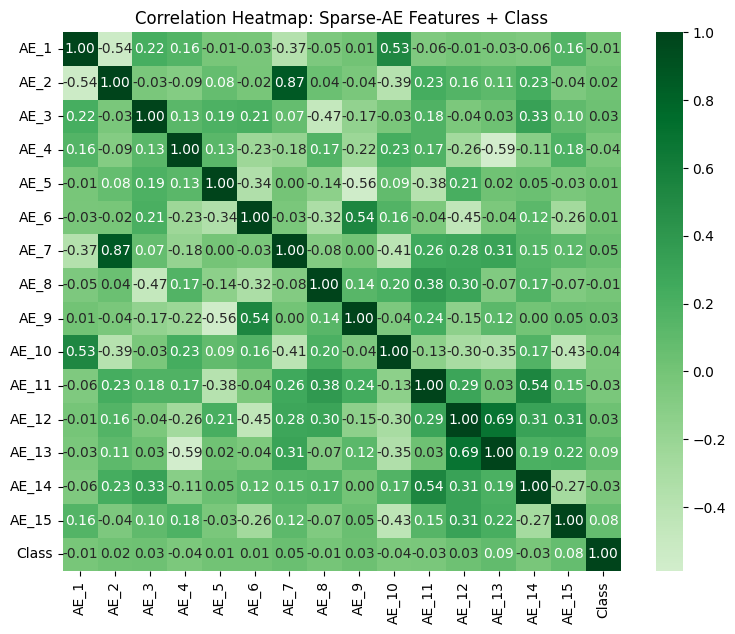

In [30]:

sae_all_df = pd.DataFrame(sae_all, columns=[f"AE_{i+1}" for i in range(sae_all.shape[1])])
sae_all_df['Class'] = df['Class'].reset_index(drop=True)
corr = sae_all_df.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr, cmap="Greens", center=0, annot=True, fmt=".2f")
plt.title("Correlation Heatmap: Sparse-AE Features + Class")
plt.show()

In [31]:
sae_all_df

,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10,AE_11,AE_12,AE_13,AE_14,AE_15,Class
0,0.017082,0.193355,0.005467,0.056380,0.023567,0.115228,0.064576,0.251091,0.154169,0.129634,0.096212,0.048809,0.025337,0.130920,0.012881,0
1,0.117576,0.010945,0.044887,0.056415,0.019004,0.107940,0.006684,0.051618,0.130373,0.085823,0.098399,0.073539,0.098826,0.082338,0.060346,0
2,0.026697,0.152226,0.087709,0.018436,0.070299,0.362834,0.072012,0.021107,0.114895,0.150461,0.037370,0.035786,0.114206,0.257285,0.006543,0
3,0.031918,0.141235,0.155635,0.051440,0.020262,0.123150,0.099373,0.231030,0.101431,0.065230,0.306810,0.127371,0.081011,0.453131,0.031286,0
4,0.063020,0.091424,0.109581,0.080525,0.031152,0.234652,0.061110,0.016833,0.101024,0.115132,0.068800,0.025248,0.035489,0.070670,0.039269,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,0.246872,0.012602,0.219809,0.007185,0.411111,0.035025,0.013788,0.060263,0.021619,0.043451,0.083257,0.712689,0.844734,0.364881,0.127504,0
283722,0.013668,0.231704,0.168320,0.028108,0.309124,0.222805,0.097916,0.008766,0.012615,0.146359,0.024652,0.028198,0.034090,0.232002,0.003633,0
283723,0.283691,0.013865,0.192349,0.225810,0.205468,0.037519,0.013854,0.024256,0.022868,0.050442,0.056703,0.124006,0.082365,0.021385,0.545558,0
283724,0.005696,0.267083,0.001432,0.029688,0.267304,0.061602,0.041952,0.076294,0.015172,0.147555,0.007458,0.022513,0.010304,0.035816,0.002920,0


# **resampling**

---



In [32]:
smote = SMOTE(
    sampling_strategy=0.1,
    k_neighbors=3,
    random_state=42
)

X_resampled_ase, y_resampled_ase = smote.fit_resample(sae_all, y)

In [33]:

labels = ["Not Fraud", "Fraud"]

# Calculate the number of samples for each class
class_counts = y_resampled_ase.value_counts()

# Print the number of samples for each class
for i in class_counts.index:
    print(f"{labels[i]}: {class_counts[i]} samples")

# Plot
fig = px.pie(
    values=class_counts.values,  # Values
    names=[labels[i] for i in class_counts.index],
    width=800,
    height=400,
    title="Data After Balance",
    color_discrete_sequence=["#2ca02c", "#98ee99"]
)

fig.show()


Not Fraud: 283253 samples
Fraud: 28325 samples


# **Data Splitting**

---

In [34]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X_resampled_ase, y_resampled_ase, test_size=0.15, random_state=42,stratify=y_resampled_ase)

val_size = 0.25 / (0.60 + 0.25)  # = 0.294

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, random_state=42,stratify=y_temp)


In [35]:
print("Train shape:     ", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:      ", X_test.shape)

Train shape:      (186946, 15)
Validation shape: (77895, 15)
Test shape:       (46737, 15)


In [36]:
print("Train shape:     ", y_train.value_counts())
print("Validation shape:", y_val.value_counts())
print("Test shape:      ", y_test.value_counts())


Train shape:      Class
0    169951
1     16995
Name: count, dtype: int64
Validation shape: Class
0    70814
1     7081
Name: count, dtype: int64
Test shape:       Class
0    42488
1     4249
Name: count, dtype: int64


# **Supervisor**

---

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

In [64]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model_xgb.fit(X_train, y_train)
y_tr_pred_tuned1 = model_xgb.predict(X_train)



C:\Users\ATHEER\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning:

[05:08:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [39]:
y_pred_xgb_val = model_xgb.predict(X_val)

# تقييم الأداء على التحقق
f1_xgb_val = f1_score(y_val, y_pred_xgb_val)

acc_xgb_val = accuracy_score(y_val, y_pred_xgb_val)

print(f"XGBoost  - F1: {f1_xgb_val:.4f}, Accuracy: {acc_xgb_val:.4f}")



XGBoost  - F1: 0.9876, Accuracy: 0.9977


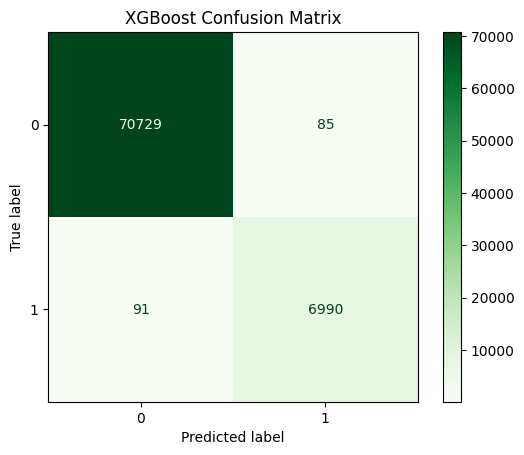

ROC AUC on validation set: 0.9999


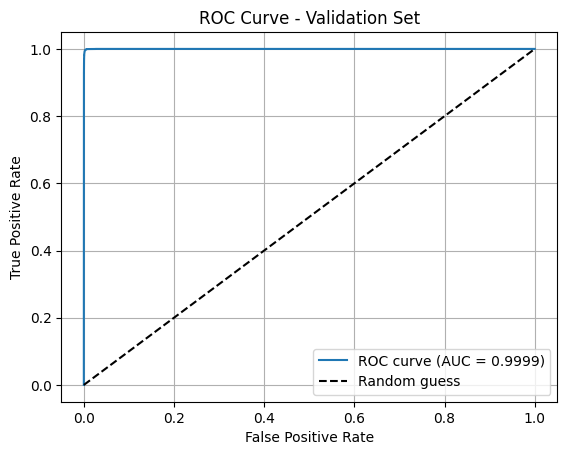

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Greens)  # هنا تغيير اللون
plt.title('XGBoost Confusion Matrix')
plt.show()


y_scores_val = model_xgb.predict_proba(X_val)[:, 1]

fpr, tpr, _ = roc_curve(y_val, y_scores_val)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC on validation set: {roc_auc:.4f}")

# رسم المنحنى
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [43]:

# 1. Define parameter grids carefully


param_grid_xgb = {
    'max_depth': [6, 9],                  # XGBoost default 6, trying deeper
    'learning_rate': [0.05, 0.1],          # Safe small steps
    'n_estimators': [100, 300],            # Number of trees
    'scale_pos_weight': [9, 10]            # Handling imbalance
}



# 2. Set up models

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


search_xgb = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_grid_xgb,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)



# 4. Fit the searches

print(" Tuning XGBoost...")
search_xgb.fit(X_train, y_train)


# 5. Evaluate on validation set

best_xgb = search_xgb.best_estimator_

print("\n Final Validation Results:")
print(f"XGBoost  - Best Params: {search_xgb.best_params_}")


 Tuning XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\ATHEER\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning:

[04:40:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





 Final Validation Results:
XGBoost  - Best Params: {'scale_pos_weight': 9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1}


In [44]:
model_XGBoost = XGBClassifier(
    scale_pos_weight=9,
    n_estimators=300,
    max_depth=9,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

model_XGBoost.fit(X_train, y_train)

y_pred_xgb_val = model_XGBoost.predict(X_val)

# تقييم الأداء على التحقق
f1_xgb_val = f1_score(y_val, y_pred_xgb_val)

acc_xgb_val = accuracy_score(y_val, y_pred_xgb_val)


print("Validation Results:")
print(f"XGBoost  - F1: {f1_xgb_val:.4f}, Accuracy: {acc_xgb_val:.4f}")

C:\Users\ATHEER\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning:

[04:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Validation Results:
XGBoost  - F1: 0.9925, Accuracy: 0.9986


In [47]:
y_pred_xgb_X_test = model_XGBoost.predict(X_test)

# تقييم الأداء على التحقق
f1_xgb_X_test = f1_score(y_test, y_pred_xgb_val)

acc_xgb_X_test = accuracy_score(y_test, y_pred_xgb_val)
print(f"XGBoost  - F1: {f1_xgb_X_test:.4f}, Accuracy: {acc_xgb_X_test:.4f}")

XGBoost  - F1: 0.9946, Accuracy: 0.9990


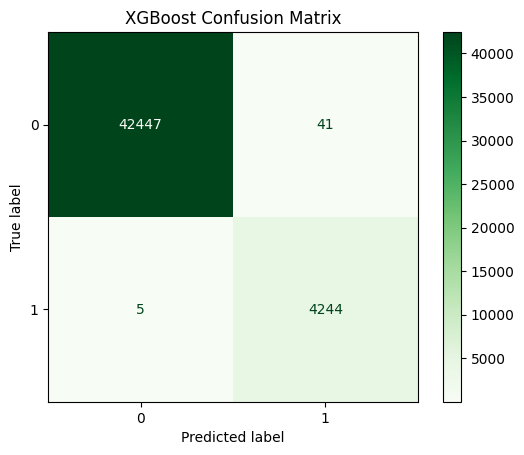

ROC AUC on validation set: 1.0000


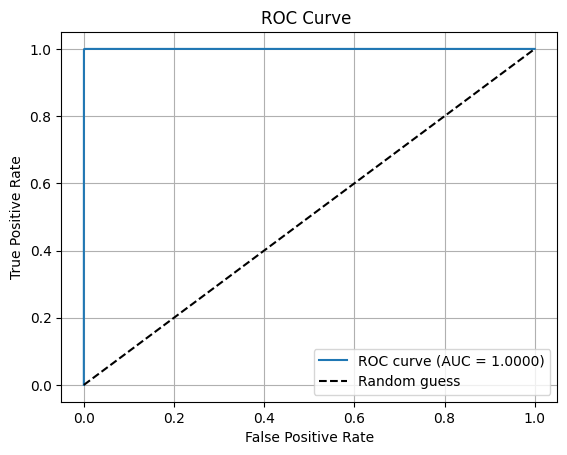

In [51]:
# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb_X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Greens)  
plt.title('XGBoost Confusion Matrix')
plt.show()


y_scores_y_test = model_XGBoost.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores_y_test)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC on validation set: {roc_auc:.4f}")

# رسم المنحنى
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Comparison**

---

In [52]:

# 1. Define parameter grids carefully

param_grid_lgb = {
    'num_leaves': [31, 50],              # Tree complexity: default 31, trying a bit bigger 50
    'max_depth': [5, 10],                 # Tree depth: 5 is shallow, 10 is medium
    'learning_rate': [0.05, 0.1],          # Safer small learning steps
    'n_estimators': [100, 300],            # Number of trees
    'scale_pos_weight': [9, 10]            # Class balance: close to your 10:1 ratio
}

param_grid_cat = {
    'depth': [6, 8],                      # Depth of trees
    'learning_rate': [0.05, 0.1],          # Learning rate
    'iterations': [500, 1000],             # CatBoost needs more trees usually
    'auto_class_weights': ['Balanced']     # Automatic balancing (important for you)
}

# 2. Set up models

model_lgb = LGBMClassifier(class_weight='balanced')
model_cat = CatBoostClassifier(verbose=0)

# 3. Set up RandomizedSearchCV for each

search_lgb = RandomizedSearchCV(
    estimator=model_lgb,
    param_distributions=param_grid_lgb,
    n_iter=10,                            # Try 10 random combinations
    scoring='f1',                         # Focus on maximizing F1 score
    cv=3,                                 # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1                             # Use all cores
)

search_cat = RandomizedSearchCV(
    estimator=model_cat,
    param_distributions=param_grid_cat,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 4. Fit the searches

print(" Tuning LightGBM...")
search_lgb.fit(X_train, y_train)

print(" Tuning CatBoost...")
search_cat.fit(X_train, y_train)

# 5. Evaluate on validation set

best_lgb = search_lgb.best_estimator_
best_cat = search_cat.best_estimator_

# Predictions
val_pred_lgb = best_lgb.predict(X_val)
val_pred_cat = best_cat.predict(X_val)

# Scores
f1_lgb = f1_score(y_val, val_pred_lgb)
f1_cat = f1_score(y_val, val_pred_cat)

acc_lgb = accuracy_score(y_val, val_pred_lgb)
acc_cat = accuracy_score(y_val, val_pred_cat)

# 6. Print Results

print("\n Final Validation Results:")
print(f"LightGBM - Best Params: {search_lgb.best_params_}, F1: {f1_lgb:.4f}, Accuracy: {acc_lgb:.4f}")
print(f"CatBoost - Best Params: {search_cat.best_params_}, F1: {f1_cat:.4f}, Accuracy: {acc_cat:.4f}")

 Tuning LightGBM...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 16995, number of negative: 169951
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 186946, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
 Tuning CatBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\ATHEER\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:317: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.

C:\Users\ATHEER\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




 Final Validation Results:
LightGBM - Best Params: {'scale_pos_weight': 9, 'num_leaves': 50, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1}, F1: 0.9858, Accuracy: 0.9974
CatBoost - Best Params: {'learning_rate': 0.1, 'iterations': 1000, 'depth': 8, 'auto_class_weights': 'Balanced'}, F1: 0.9895, Accuracy: 0.9981


In [53]:
model_LGBM = LGBMClassifier(
    scale_pos_weight=9,
    num_leaves=50,
    n_estimators=300,
    max_depth=10,
    learning_rate=0.1,
    class_weight=None
)

model_CatBoost = CatBoostClassifier(
    learning_rate=0.1,
    iterations=1000,
    depth=8,
    auto_class_weights='Balanced',
    verbose=0
)

model_LGBM.fit(X_train, y_train)
model_CatBoost.fit(X_train, y_train)

# التنبؤ على مجموعة التحقق (Validation)
y_pred_light_val = model_LGBM.predict(X_val)
y_pred_cat_val = model_CatBoost.predict(X_val)

# تقييم الأداء على التحقق
f1_light_val = f1_score(y_val, y_pred_light_val)
f1_cat_val = f1_score(y_val, y_pred_cat_val)

acc_light_val = accuracy_score(y_val, y_pred_light_val)
acc_cat_val = accuracy_score(y_val, y_pred_cat_val)


print("Validation Results:")
print(f"LightGBM - F1: {f1_light_val:.4f}, Accuracy: {acc_light_val:.4f}")
print(f"CatBoost - F1: {f1_cat_val:.4f}, Accuracy: {acc_cat_val:.4f}")

[LightGBM] [Info] Number of positive: 16995, number of negative: 169951
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 186946, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090909 -> initscore=-2.302591
[LightGBM] [Info] Start training from score -2.302591


C:\Users\ATHEER\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



Validation Results:
LightGBM - F1: 0.9916, Accuracy: 0.9985
CatBoost - F1: 0.9895, Accuracy: 0.9981


In [55]:

y_pred_light_test = model_LGBM.predict(X_test)
y_pred_cat_test = model_CatBoost.predict(X_test)

f1_light_test = f1_score(y_test, y_pred_light_test)
f1_cat_test = f1_score(y_test, y_pred_cat_test)

acc_light_test = accuracy_score(y_test, y_pred_light_test)
acc_cat_test = accuracy_score(y_test, y_pred_cat_test)


print("\n Test Results:")
print(f"LightGBM - F1: {f1_light_test:.4f}, Accuracy: {acc_light_test:.4f}")
print(f"CatBoost - F1: {f1_cat_test:.4f}, Accuracy: {acc_cat_test:.4f}")



 Test Results:
LightGBM - F1: 0.9936, Accuracy: 0.9988
CatBoost - F1: 0.9902, Accuracy: 0.9982


C:\Users\ATHEER\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



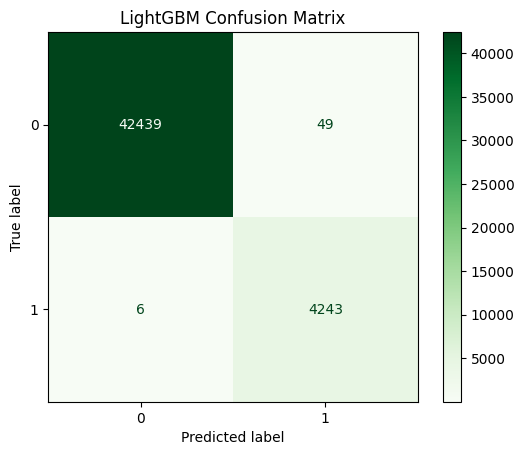

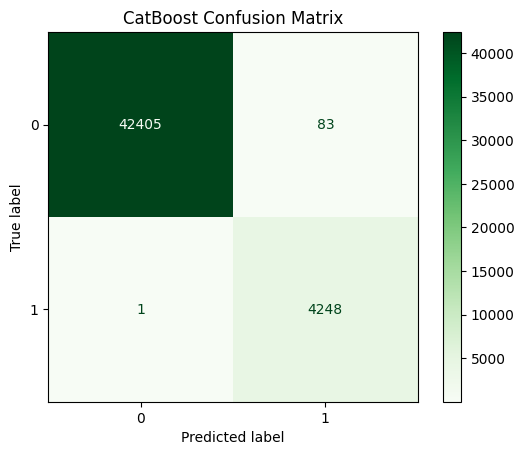

In [57]:

# LightGBM Confusion Matrix
cm_lgb = confusion_matrix(y_test, y_pred_light_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Greens)  # هنا تغيير اللون
plt.title('LightGBM Confusion Matrix')
plt.show()

# CatBoost Confusion Matrix
cm_cat = confusion_matrix(y_test, y_pred_cat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cat, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Greens)  # هنا تغيير اللون
plt.title('CatBoost Confusion Matrix')
plt.show()

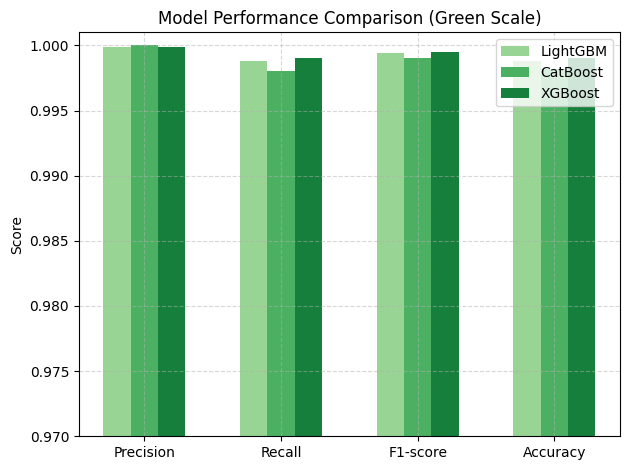

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# بيانات المقارنة (precision, recall, f1-score لكل نموذج)
data = {
    "Model": ["LightGBM", "CatBoost", "XGBoost"],
    "Precision": [0.9999, 1.0000, 0.9999],
    "Recall":    [0.9988, 0.9980, 0.9990],
    "F1-score":  [0.9994, 0.9990, 0.9995],
    "Accuracy":  [0.9988, 0.9982, 0.9990]
}

df = pd.DataFrame(data)

# رسم شريطي للمقارنة
metrics = ["Precision", "Recall", "F1-score", "Accuracy"]
x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots()
for i, model in enumerate(df["Model"]):
    ax.bar(x + i * width, df.loc[i, metrics], width, label=model, color=plt.cm.Greens(0.4 + i * 0.2))

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (Green Scale)')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.set_ylim(0.97, 1.001)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


C:\Users\ATHEER\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



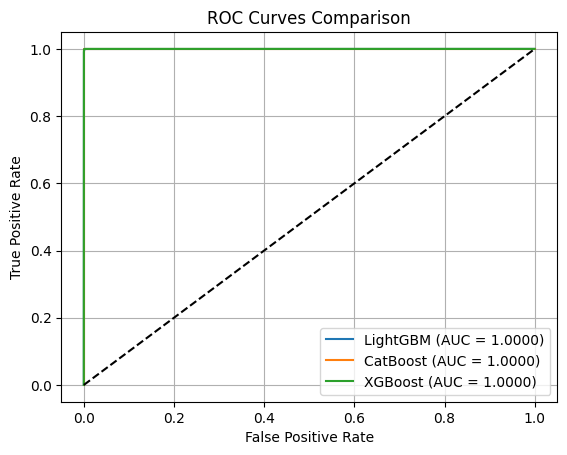

In [63]:
from sklearn.metrics import roc_curve, auc


# تأكد أن كل نموذج يعطي احتمالات predict_proba
for name, model in zip(['LightGBM', 'CatBoost', 'XGBoost'], [model_LGBM, model_CatBoost, model_XGBoost]):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
